In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_excel('basketboll_dataset_txbd.xlsx')

In [37]:
# Очистка и обработка данных


# Удаляем строки, где в колонке 'not' значение 1df = df[df['not'].isna()]
# Сбрасываем индексы, если нужно
df.reset_index(drop=True, inplace=True)

# Удаляем колонку not
df = df.drop('not', axis=1)

# Выбираем все числовые колонки, кроме 'Очки за матч'
#numeric_columns = df.select_dtypes(include=['float', 'int']).columns
#columns_to_round = [col for col in numeric_columns if col != 'Очки за матч']
# Применяем округление к нужным колонкам
#df[columns_to_round] = df[columns_to_round].astype(int)

# Увеличиваем индекс на 1
df.index += 1

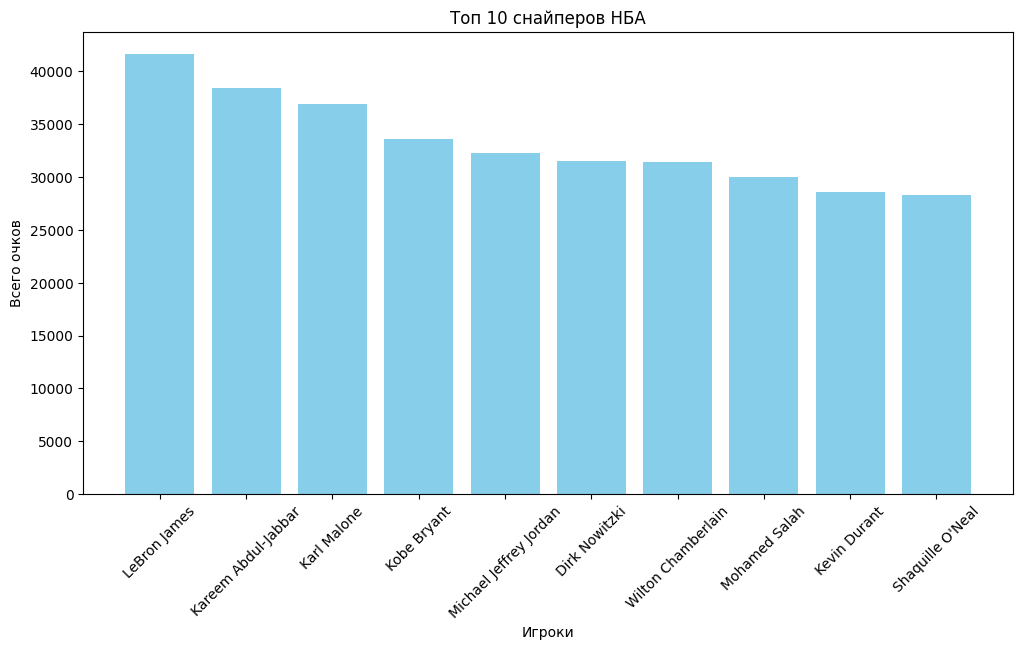

In [38]:

top_10 = df.sort_values(by='Всего очков', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10["Игроки"], top_10["Всего очков"], color='skyblue')
plt.xlabel("Игроки")
plt.ylabel("Всего очков")
plt.title("Топ 10 снайперов НБА")
plt.xticks(rotation=45)
plt.show()

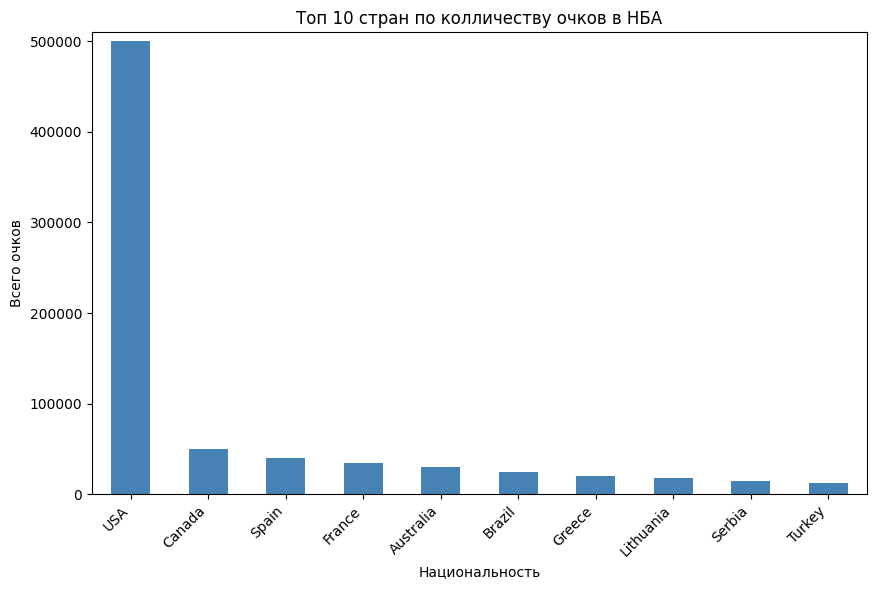

In [39]:
countries = ['USA', 'Canada', 'Spain', 'France', 'Australia', 'Brazil', 'Greece', 'Lithuania', 'Serbia', 'Turkey']
total_goal = [500000, 50000, 40000, 35000, 30000, 25000, 20000, 18000, 15000, 12000]

df1 = pd.DataFrame({
    'Национальность': countries,
    'Всего очков': total_goal
})

total_goals_by_country = df1.groupby('Национальность')['Всего очков'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
total_goals_by_country.plot(kind='bar', color='steelblue')
plt.xlabel('Национальность')
plt.ylabel('Всего очков')
plt.ylim(0, 510000)
plt.title('Топ 10 стран по колличеству очков в НБА')
plt.xticks(rotation=45, ha='right')
plt.show()

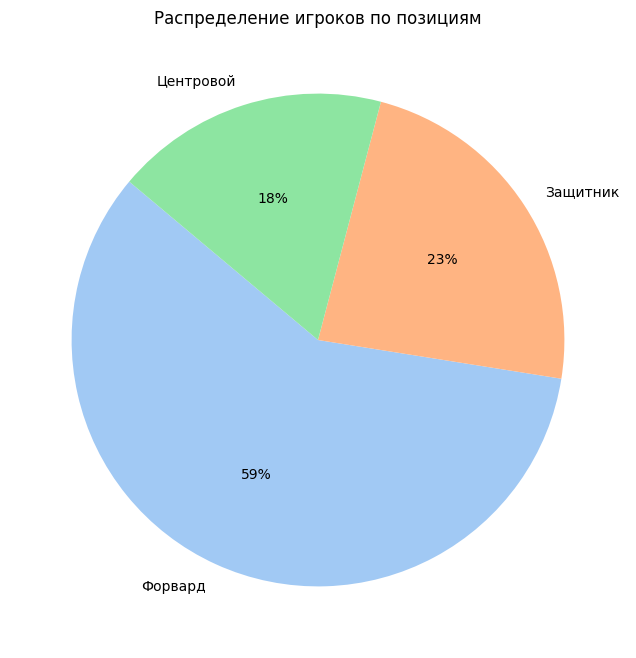

In [40]:
#вторая


import matplotlib.pyplot as plt
import seaborn as sns

# Подсчитываем количество игроков по позициям
position_counts = df['Позиция'].value_counts()

# Приведение к единому виду (если требуется)
position_counts.index = position_counts.index.str.strip().str.lower().str.capitalize()

# Сортируем по убыванию
position_counts = position_counts.sort_values(ascending=False)

# Добавляем категорию "Другие" для позиций с малым количеством игроков
median_count = position_counts.median()
top_positions = position_counts[position_counts >= median_count]
other_positions = position_counts[position_counts < median_count].sum()

# Объединяем в один DataFrame
position_counts_filtered = top_positions.copy()
position_counts_filtered['Центровой'] = other_positions

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    position_counts_filtered,
    labels=position_counts_filtered.index.str.capitalize(),  # Приводим к красивому формату
    autopct=lambda p: f'{int(round(p))}%',  # Убираем плавающую точку
    startangle=140,
    colors=sns.color_palette('pastel', len(position_counts_filtered))
)
plt.title('Распределение игроков по позициям')
plt.show()


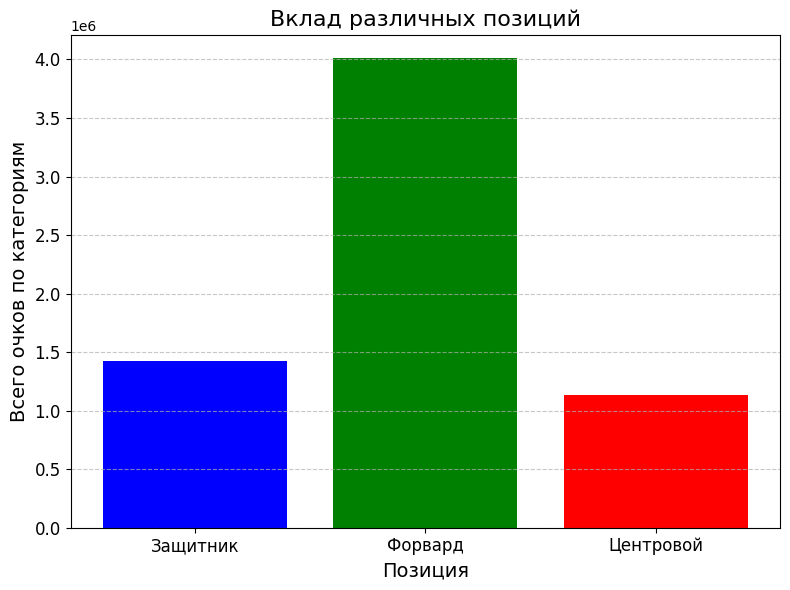

In [41]:

# Группировка данных по категориям и суммирование голов
category_goals = df.groupby('Позиция')['Всего очков'].sum().reset_index()

# Построение гистограммы
plt.figure(figsize=(8, 6))
plt.bar(category_goals['Позиция'], category_goals['Всего очков'], color=['blue', 'green', 'red'])
plt.title('Вклад различных позиций', fontsize=16)
plt.xlabel('Позиция', fontsize=14)
plt.ylabel('Всего очков по категориям', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Отображение графика
plt.show()

<ipython-input-42-ef29f41b4d47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(scaled_features)


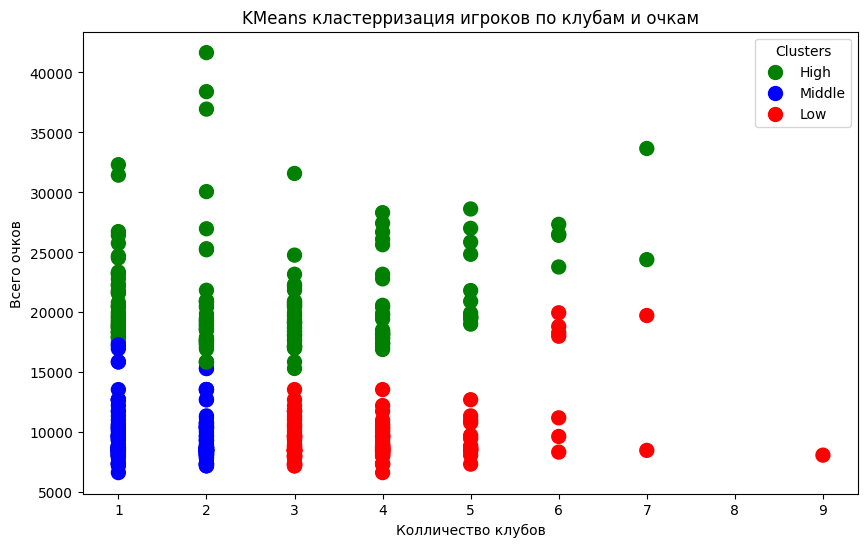

In [42]:
#работа с клубами

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Масштабирование данных
scaler = StandardScaler()
df = df.dropna(subset=['Клуб', 'Всего очков'])
scaled_features = scaler.fit_transform(df[['Клуб', 'Всего очков']])

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)
# Визуализация результатов
colors = {0: 'blue', 1: 'green', 2: 'red'}
cluster_labels = {0: 'Middle', 1: 'High', 2: 'Low'}

plt.figure(figsize=(10, 6))
plt.scatter(df['Клуб'], df['Всего очков'], c=df['Cluster'].map(colors), s=100)

# Добавление легенды с описанием
plt.scatter([], [], c='green', label='High', s=100)
plt.scatter([], [], c='blue', label='Middle', s=100)
plt.scatter([], [], c='red', label='Low', s=100)
plt.legend(loc='upper right', title="Clusters")

plt.xlabel('Колличество клубов')
plt.ylabel('Всего очков')
plt.title('KMeans кластерризация игроков по клубам и очкам')
plt.show()


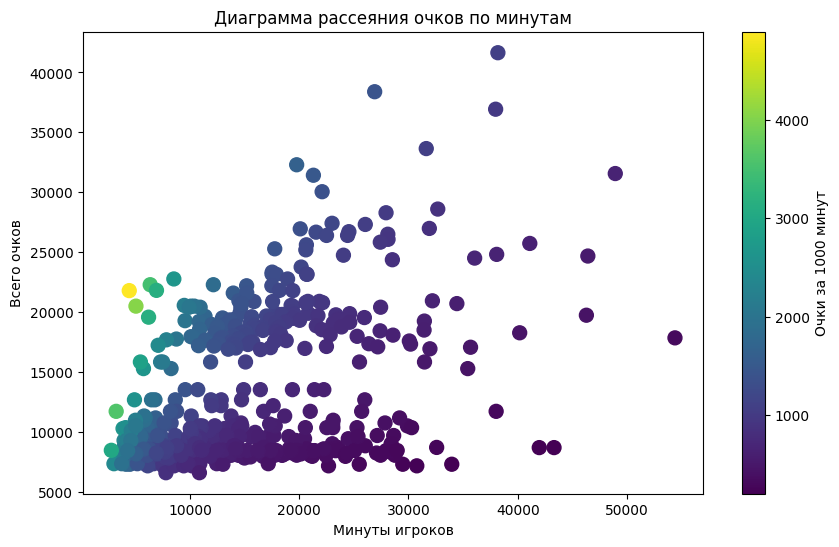

In [43]:
#третий график

import matplotlib.pyplot as plt

# Создаем столбец для эффективности: голов на 1000 минут
df['Очки за 1000 минут'] = (df['Всего очков'] / df['Минуты']) * 1000

# Диаграмма рассеяния очков по минутам
plt.figure(figsize=(10, 6))
plt.scatter(df['Минуты'], df['Всего очков'], c=df['Очки за 1000 минут'], cmap='viridis', s=100)
plt.colorbar(label='Очки за 1000 минут')
plt.xlabel('Минуты игроков')
plt.ylabel('Всего очков')
plt.title('Диаграмма рассеяния очков по минутам')
plt.show()

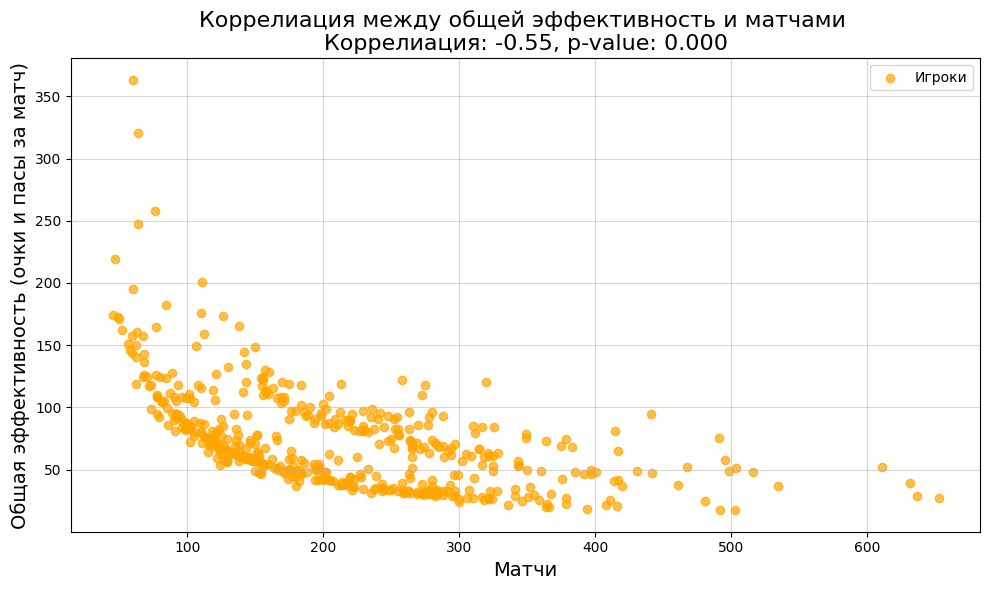

Корреляция между эффективностью и матчами: -0.5457394743648889
P-value: 3.78425723283927e-40


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


df['Общая эффективность'] = (df['Всего очков'] + df['Пас']) / df['Матчи']

# Вычисляем корреляцию и p-value между эффективностью и количеством матчей
correlation, p_value = pearsonr(df['Общая эффективность'], df['Матчи'])

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df['Матчи'], df['Общая эффективность'], color='orange', alpha=0.7, label='Игроки')
plt.title(f'Коррелиация между общей эффективность и матчами \nКоррелиация: {correlation:.2f}, p-value: {p_value:.3f}', fontsize=16)
plt.xlabel('Матчи', fontsize=14)
plt.ylabel('Общая эффективность (очки и пасы за матч)', fontsize=14)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Вывод результата
print("Корреляция между эффективностью и матчами:", correlation)
print("P-value:", p_value)